In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import glob
import pandas as pd
import os

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import glob
import pandas as pd
import os

# Load tokenizer and model from Hugging Face Model Hub
model_name = "distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Ensure the model uses GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def get_emotion(text):
    # Encode the text using the tokenizer
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512).to(device)
    # Perform the prediction
    with torch.no_grad():
        output = model(**encoded_input)
    # Calculate softmax to get probabilities of each emotion
    probabilities = softmax(output.logits.cpu().numpy()[0])
    # Fetching the labels from model's configuration
    labels = model.config.id2label
    # Create a dictionary of labels and their corresponding probabilities
    emotion_scores = {labels[i]: probabilities[i] for i in range(len(labels))}
    return emotion_scores

files = glob.glob("hurricane_helene2024-10-06*.csv")
files.sort(key=os.path.getctime)
csv_files=files
print(files)
n=1
for file in tqdm(csv_files):
    # Read the CSV file
    df_drought = pd.read_csv(file, sep='\t')
    file_name = os.path.basename(file)
    new_path = os.path.join(os.path.dirname(file), "emotions", file_name)
    # Process 'transcript' column
    df_drought['transcript'] = df_drought['transcript'].fillna('')  # Replace NaN with empty string
    df_drought['transcript'] = df_drought['transcript'].astype(str)  # Ensure all entries are strings

    emotion_data = df_drought['transcript'].apply(get_emotion).apply(pd.Series)
    emotion_data = emotion_data.add_prefix('transcript_')
    df_drought = pd.concat([df_drought, emotion_data], axis=1)

    # Process 'comments' column
    df_drought['comments'] = df_drought['comments'].fillna('')  # Replace NaN with empty string
    df_drought['comments'] = df_drought['comments'].astype(str)  # Ensure all entries are strings

    emotion_data = df_drought['comments'].apply(get_emotion).apply(pd.Series)
    emotion_data = emotion_data.add_prefix('comments_')
    df_drought = pd.concat([df_drought, emotion_data], axis=1)

    # Process 'title' column
    df_drought['title'] = df_drought['title'].fillna('')  # Replace NaN with empty string
    df_drought['title'] = df_drought['title'].astype(str)  # Ensure all entries are strings

    emotion_data = df_drought['title'].apply(get_emotion).apply(pd.Series)
    emotion_data = emotion_data.add_prefix('title_')
    df_drought = pd.concat([df_drought, emotion_data], axis=1)
    
    df_drought.to_csv(new_path, sep='\t', index=False)
    n=n+1

ModuleNotFoundError: No module named 'torch'

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import glob
import pandas as pd
import os

# Load tokenizer and model from Hugging Face Model Hub
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Ensure the model uses GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
files = glob.glob("hurricane_helene*.csv")
files.sort(key=os.path.getctime)
csv_files=files
print(files)

[]


In [5]:
import pandas as pd

df_drought = pd.read_csv(r"hh.csv"
, sep='\t')

In [5]:

df_drought['transcript'] = df_drought['transcript'].fillna('')  # Replace NaN with empty string
df_drought['transcript'] = df_drought['transcript'].astype(str)  # Ensure all entries are strings

emotion_data = df_drought['transcript'].apply(get_emotion).apply(pd.Series)
emotion_data = emotion_data.add_prefix('transcript_')
df_drought = pd.concat([df_drought, emotion_data], axis=1)

# Process 'comments' column
df_drought['comments'] = df_drought['comments'].fillna('')  # Replace NaN with empty string
df_drought['comments'] = df_drought['comments'].astype(str)  # Ensure all entries are strings

emotion_data = df_drought['comments'].apply(get_emotion).apply(pd.Series)
emotion_data = emotion_data.add_prefix('comments_')
df_drought = pd.concat([df_drought, emotion_data], axis=1)

# Process 'title' column
df_drought['title'] = df_drought['title'].fillna('')  # Replace NaN with empty string
df_drought['title'] = df_drought['title'].astype(str)  # Ensure all entries are strings

emotion_data = df_drought['title'].apply(get_emotion).apply(pd.Series)
emotion_data = emotion_data.add_prefix('title_')
df_drought = pd.concat([df_drought, emotion_data], axis=1)

df_drought.to_csv('hh.csv', sep='\t', index=False)


In [25]:
df_drought.publishTime

0     2024-10-05 20:33:41+00:00
1     2024-10-05 18:42:05+00:00
2     2024-10-04 22:46:38+00:00
3     2024-10-05 16:48:11+00:00
4     2024-10-06 14:30:31+00:00
                 ...           
541   2024-10-05 05:16:09+00:00
542   2024-10-04 02:00:21+00:00
543   2024-10-03 16:46:17+00:00
544   2024-10-03 18:31:52+00:00
545   2024-10-03 22:29:28+00:00
Name: publishTime, Length: 546, dtype: datetime64[ns, UTC]

In [21]:
df_drought.columns 

Index(['Unnamed: 0', 'videoId', 'channelId', 'channelTitle', 'description',
       'publishTime', 'title', 'commentCount', 'dislikeCount', 'favoriteCount',
       'likeCount', 'viewCount', 'duration', 'transcript', 'url', 'comments',
       'transcript_sadness', 'transcript_joy', 'transcript_love',
       'transcript_anger', 'transcript_fear', 'transcript_surprise',
       'comments_sadness', 'comments_joy', 'comments_love', 'comments_anger',
       'comments_fear', 'comments_surprise', 'title_sadness', 'title_joy',
       'title_love', 'title_anger', 'title_fear', 'title_surprise'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert the publishTime column to datetime
#df_drought['publishTime'] = pd.to_datetime(df_drought['publishTime'])

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_drought['publishTime'], df_drought['title_sadness'], marker='o', linestyle='-', color='b')

# Step 3: Customize the plot
plt.xlabel('Publish Time')
plt.ylabel('Title Sadness')
plt.title('Title Sadness as a Function of Publish Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
df_drought['publishTime'] = pd.to_datetime(df_drought['publishTime'])
# Check for NaN values
print(df_drought.isnull().sum())

# Optionally, drop rows with NaN values in the relevant columns
df_drought_clean = df_drought.dropna(subset=['publishTime', 'title_sadness'])


Unnamed: 0               0
videoId                  0
channelId                0
channelTitle             0
description             22
publishTime              0
title                    0
commentCount            21
dislikeCount           546
favoriteCount            0
likeCount                5
viewCount                0
duration               546
transcript               0
url                      0
comments                 0
transcript_sadness       0
transcript_joy           0
transcript_love          0
transcript_anger         0
transcript_fear          0
transcript_surprise      0
comments_sadness         0
comments_joy             0
comments_love            0
comments_anger           0
comments_fear            0
comments_surprise        0
title_sadness            0
title_joy                0
title_love               0
title_anger              0
title_fear               0
title_surprise           0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(df_drought['publishTime'], df_drought['title_sadness'], marker='o', linestyle='-', color='b')


In [ ]:
import matplotlib.pyplot as plt

# Enable interactive mode
plt.ion()

# Plot the data
plt.plot(df_drought['publishTime'], df_drought['title_sadness'], marker='o', linestyle='-', color='b')

# Customize and show the plot
plt.xlabel('Publish Time')
plt.ylabel('Title Sadness')
plt.title('Title Sadness as a Function of Publish Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Disable interactive mode (if needed)
plt.ioff()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_drought = pd.read_csv(r"hh.csv", sep='\t')
df_drought

,Unnamed: 0,videoId,channelId,channelTitle,description,publishTime,title,commentCount,dislikeCount,favoriteCount,...,comments_love,comments_anger,comments_fear,comments_surprise,title_sadness,title_joy,title_love,title_anger,title_fear,title_surprise
0,0,Iiukc5Z5kA0,UCdy3vTomYlwA0d-XI5kkP2w,The Bergamot,Our Experience During Hurricane Helene This is...,2024-10-05T20:33:41Z,What Actually Happened in Asheville: A Hurrica...,4789.0,NaN,0,...,0.000178,0.000613,0.000634,0.000142,0.010705,0.007057,0.000749,0.021927,0.952425,0.007137
1,1,NCHx9LfdPi8,UCF8lQByNCOdwpPnk1y61Aow,Yak Motley,Here are my thoughts of the Hurricane Helene a...,2024-10-05T18:42:05Z,They are lying to you about the Hurricane Hele...,23338.0,NaN,0,...,0.002200,0.021255,0.039401,0.006351,0.002777,0.002424,0.000459,0.958212,0.035618,0.000509
2,2,5bWYpFN8-QQ,UCBu0KdNokE4MqdkacvH37_A,WFAA,At least 215 people have been killed and offic...,2024-10-04T22:46:38Z,Rescue crews finally reach hardest hit areas f...,1726.0,NaN,0,...,0.001217,0.934289,0.019210,0.001088,0.136298,0.189718,0.008153,0.025158,0.632863,0.007809
3,3,u8ejFXYXTss,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,"Hurricane Helene tore through Florida, but the...",2024-10-05T16:48:11Z,Forgotten Fury Hurricane Helene&#39;s Devastat...,3024.0,NaN,0,...,0.000725,0.014882,0.932271,0.001046,0.977147,0.006479,0.000925,0.004409,0.009613,0.001427
4,4,pjpeCfIvSRA,UCCXoCcu9Rp7NPbTzIvogpZg,Fox Business,Cajun Navy 2016 Vice President Ben Husser join...,2024-10-06T14:30:31Z,Hurricane Helene devastation &#39;unlike anyth...,281.0,NaN,0,...,0.000911,0.844014,0.014785,0.000986,0.082693,0.483455,0.007452,0.224584,0.192782,0.009033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,541,31H6snKDH6s,UCb6qkJlDxTi7nZXUQ_14pyg,Nardy Global,If you would like to donate here's a link http...,2024-10-05T05:16:09Z,😳 Hurricane Helene destroys North Carolina #sh...,795.0,NaN,0,...,0.007606,0.107380,0.022811,0.002033,0.488060,0.019538,0.002797,0.395313,0.091637,0.002655
542,542,4ZhtRLYAan4,UCGR9dnojORtvWkZiSaawkng,Cardinal & Pine,Chimney Rock and the surrounding areas were am...,2024-10-04T02:00:21Z,Rutherford County Residents Recount the Devast...,12.0,NaN,0,...,0.004352,0.165904,0.008316,0.000820,0.729211,0.100151,0.005638,0.040427,0.118695,0.005877
543,543,TEfcct61XxU,UCaK2yCNwdSw9GiFuFes0OPg,"Foxx Photos, LLC",hurricane #hurricanehelene #wncmountains #floo...,2024-10-03T16:46:17Z,Militia Members Out After Hurricane Helene Wes...,NaN,NaN,0,...,0.016481,0.376577,0.170945,0.014832,0.028511,0.014950,0.002412,0.053444,0.898255,0.002427
544,544,d7gV3v43Xoo,UCT1VpF8k57wRSJeXYy6-QLA,Jon hub Vlog,NaN,2024-10-03T18:31:52Z,Hurricane Helene #praying #hurricane #helene #...,59.0,NaN,0,...,0.000278,0.000503,0.000222,0.000115,0.998469,0.000380,0.000307,0.000258,0.000439,0.000147


In [5]:
import pandas as pd

# Convert the 'publishTime' to datetime format
df_drought['publishTime'] = pd.to_datetime(df_drought['publishTime'], format='%Y-%m-%dT%H:%M:%SZ')

# Ensure data is sorted by time
df_drought = df_drought.sort_values(by='publishTime')


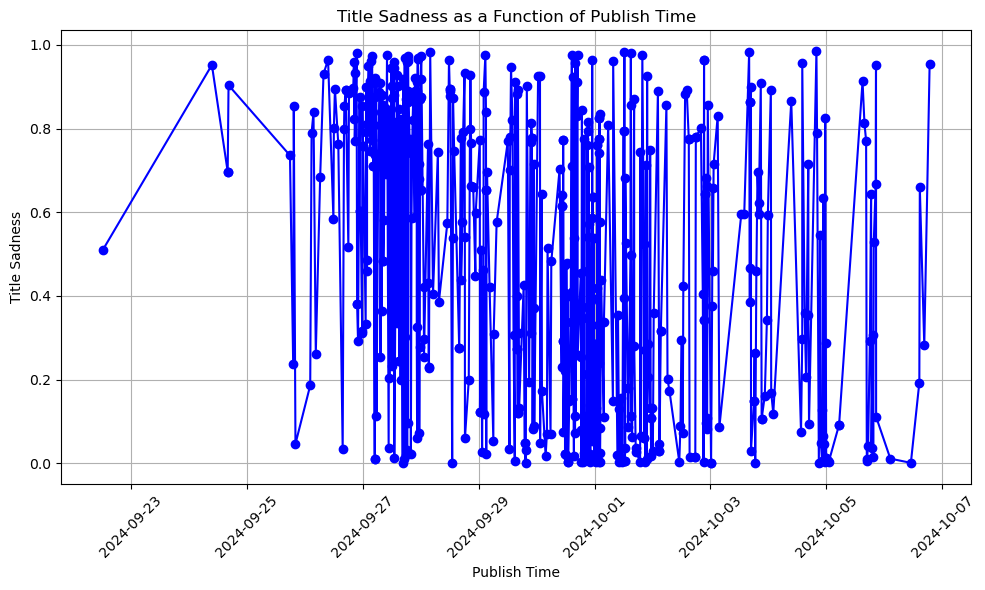

In [17]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_drought['publishTime'], df_drought['title_fear'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel('Publish Time')
plt.ylabel('Title Sadness')
plt.title('Title Sadness as a Function of Publish Time')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


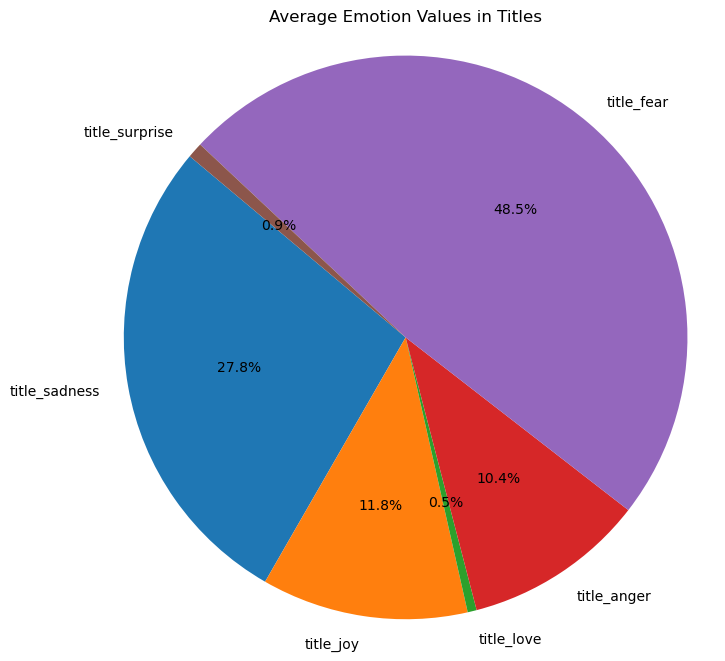

In [13]:
columns = ['title_sadness', 'title_joy', 'title_love', 'title_anger', 'title_fear', 'title_surprise']

# Calculate the average of the values in the specified columns
average_values = df_drought[columns].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=columns, autopct='%1.1f%%', startangle=140)
plt.title('Average Emotion Values in Titles')
plt.axis('equal')  # Equal aspect ratio ensure
plt.savefig("titlese.png", dpi=300)


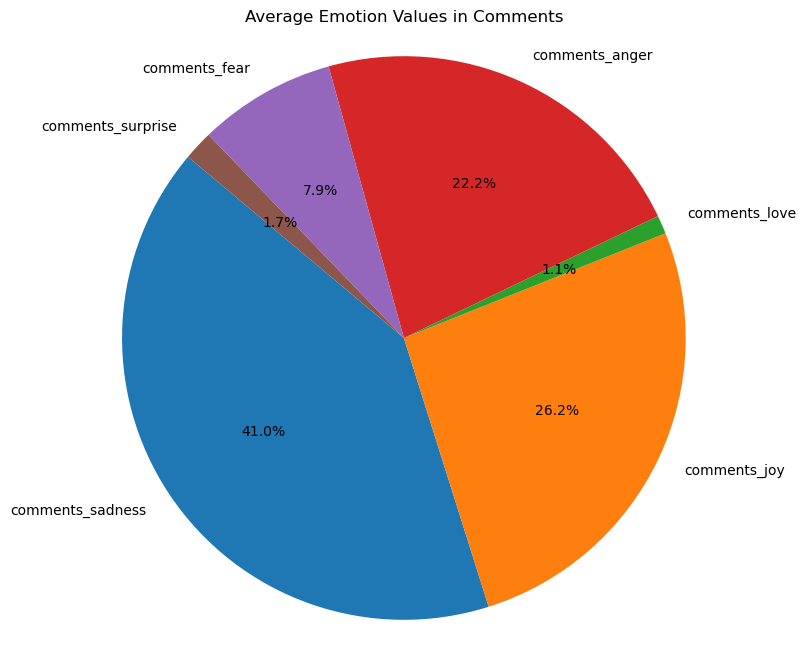

In [15]:
columns = ['comments_sadness', 'comments_joy', 'comments_love', 'comments_anger',
       'comments_fear', 'comments_surprise']

# Calculate the average of the values in the specified columns
average_values = df_drought[columns].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=columns, autopct='%1.1f%%', startangle=140)
plt.title('Average Emotion Values in Comments')
plt.axis('equal')  # Equal aspect ratio ensure
plt.savefig("commentse.png", dpi=300)


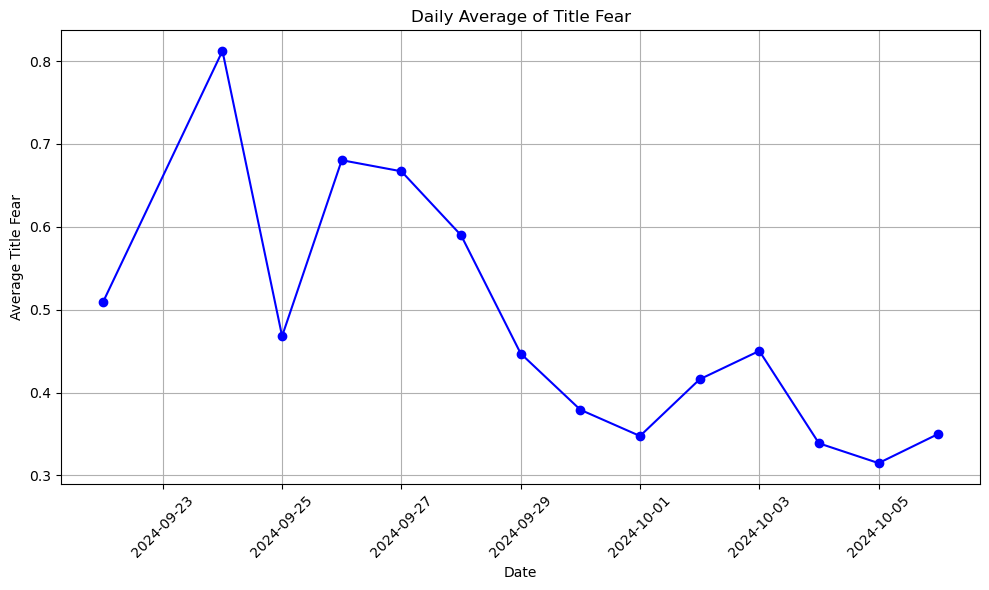

In [19]:
df_drought['date'] = df_drought['publishTime'].dt.date

# Group by date and calculate the daily average of 'title_fear'
daily_avg_fear = df_drought.groupby('date')['title_fear'].mean()

# Plot the daily average
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_fear.index, daily_avg_fear.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Average Title Fear')
plt.title('Daily Average of Title Fear')
plt.xticks(rotation=45)
plt.grid(True)

# Save as PNG with 300 DPI
plt.tight_layout()
plt.savefig("daily_avg_title_fear.png", dpi=300)

# Optionally show the plot
plt.show()

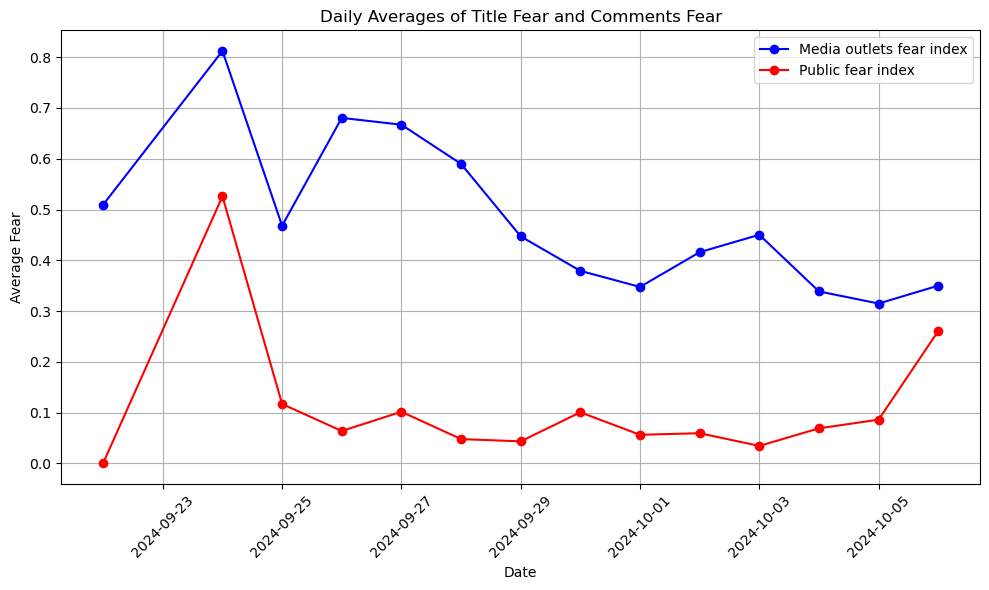

In [23]:
# Extract the date from 'publishTime' to group by day
df_drought['date'] = df_drought['publishTime'].dt.date

# Group by date and calculate the daily average of 'title_fear' and 'comments_fear'
daily_avg_fear = df_drought.groupby('date')[['title_fear', 'comments_fear']].mean()

# Plot the daily averages
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_fear.index, daily_avg_fear['title_fear'], marker='o', linestyle='-', color='b', label='Media outlets fear index')
plt.plot(daily_avg_fear.index, daily_avg_fear['comments_fear'], marker='o', linestyle='-', color='r', label='Public fear index')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Average Fear')
plt.title('Daily Averages of Title Fear and Comments Fear')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Save the plot as PNG with 300 DPI
plt.tight_layout()
plt.savefig("daily_avg_title_and_comments_fear.png", dpi=300)

# Optionally show the plot
plt.show()

In [7]:
df_drought

,Unnamed: 0,videoId,channelId,channelTitle,description,publishTime,title,commentCount,dislikeCount,favoriteCount,...,comments_love,comments_anger,comments_fear,comments_surprise,title_sadness,title_joy,title_love,title_anger,title_fear,title_surprise
0,0,Iiukc5Z5kA0,UCdy3vTomYlwA0d-XI5kkP2w,The Bergamot,Our Experience During Hurricane Helene This is...,2024-10-05T20:33:41Z,What Actually Happened in Asheville: A Hurrica...,4789.0,NaN,0,...,0.000178,0.000613,0.000634,0.000142,0.010705,0.007057,0.000749,0.021927,0.952425,0.007137
1,1,NCHx9LfdPi8,UCF8lQByNCOdwpPnk1y61Aow,Yak Motley,Here are my thoughts of the Hurricane Helene a...,2024-10-05T18:42:05Z,They are lying to you about the Hurricane Hele...,23338.0,NaN,0,...,0.002200,0.021255,0.039401,0.006351,0.002777,0.002424,0.000459,0.958212,0.035618,0.000509
2,2,5bWYpFN8-QQ,UCBu0KdNokE4MqdkacvH37_A,WFAA,At least 215 people have been killed and offic...,2024-10-04T22:46:38Z,Rescue crews finally reach hardest hit areas f...,1726.0,NaN,0,...,0.001217,0.934289,0.019210,0.001088,0.136298,0.189718,0.008153,0.025158,0.632863,0.007809
3,3,u8ejFXYXTss,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,"Hurricane Helene tore through Florida, but the...",2024-10-05T16:48:11Z,Forgotten Fury Hurricane Helene&#39;s Devastat...,3024.0,NaN,0,...,0.000725,0.014882,0.932271,0.001046,0.977147,0.006479,0.000925,0.004409,0.009613,0.001427
4,4,pjpeCfIvSRA,UCCXoCcu9Rp7NPbTzIvogpZg,Fox Business,Cajun Navy 2016 Vice President Ben Husser join...,2024-10-06T14:30:31Z,Hurricane Helene devastation &#39;unlike anyth...,281.0,NaN,0,...,0.000911,0.844014,0.014785,0.000986,0.082693,0.483455,0.007452,0.224584,0.192782,0.009033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,541,31H6snKDH6s,UCb6qkJlDxTi7nZXUQ_14pyg,Nardy Global,If you would like to donate here's a link http...,2024-10-05T05:16:09Z,😳 Hurricane Helene destroys North Carolina #sh...,795.0,NaN,0,...,0.007606,0.107380,0.022811,0.002033,0.488060,0.019538,0.002797,0.395313,0.091637,0.002655
542,542,4ZhtRLYAan4,UCGR9dnojORtvWkZiSaawkng,Cardinal & Pine,Chimney Rock and the surrounding areas were am...,2024-10-04T02:00:21Z,Rutherford County Residents Recount the Devast...,12.0,NaN,0,...,0.004352,0.165904,0.008316,0.000820,0.729211,0.100151,0.005638,0.040427,0.118695,0.005877
543,543,TEfcct61XxU,UCaK2yCNwdSw9GiFuFes0OPg,"Foxx Photos, LLC",hurricane #hurricanehelene #wncmountains #floo...,2024-10-03T16:46:17Z,Militia Members Out After Hurricane Helene Wes...,NaN,NaN,0,...,0.016481,0.376577,0.170945,0.014832,0.028511,0.014950,0.002412,0.053444,0.898255,0.002427
544,544,d7gV3v43Xoo,UCT1VpF8k57wRSJeXYy6-QLA,Jon hub Vlog,NaN,2024-10-03T18:31:52Z,Hurricane Helene #praying #hurricane #helene #...,59.0,NaN,0,...,0.000278,0.000503,0.000222,0.000115,0.998469,0.000380,0.000307,0.000258,0.000439,0.000147


In [15]:
import pandas as pd
from collections import Counter
import re

# Assuming df_drought is already loaded
df_drought['title'] = df_drought['title'].astype(str)  # Ensure it's string type

# Combine all comments into one text
all_text = ' '.join(df_drought['title'])

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count word frequencies
word_counts = Counter(words)

# Get the 10 most common words
most_common_words = word_counts.most_common(50)
print(most_common_words)


[('helene', 537), ('hurricane', 502), ('in', 167), ('39', 118), ('to', 93), ('florida', 84), ('of', 83), ('the', 80), ('s', 77), ('after', 75), ('storm', 71), ('north', 61), ('carolina', 59), ('as', 58), ('from', 55), ('aftermath', 54), ('death', 43), ('flooding', 43), ('toll', 42), ('and', 42), ('damage', 38), ('destruction', 32), ('on', 31), ('asheville', 28), ('nc', 27), ('4', 26), ('devastation', 25), ('by', 25), ('is', 24), ('at', 24), ('live', 23), ('category', 23), ('for', 22), ('landfall', 21), ('surge', 21), ('across', 20), ('beach', 20), ('us', 19), ('rises', 19), ('trump', 18), ('southeast', 18), ('least', 17), ('it', 16), ('catastrophic', 16), ('update', 16), ('news', 15), ('with', 15), ('recovery', 15), ('more', 15), ('county', 15)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dashtianh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


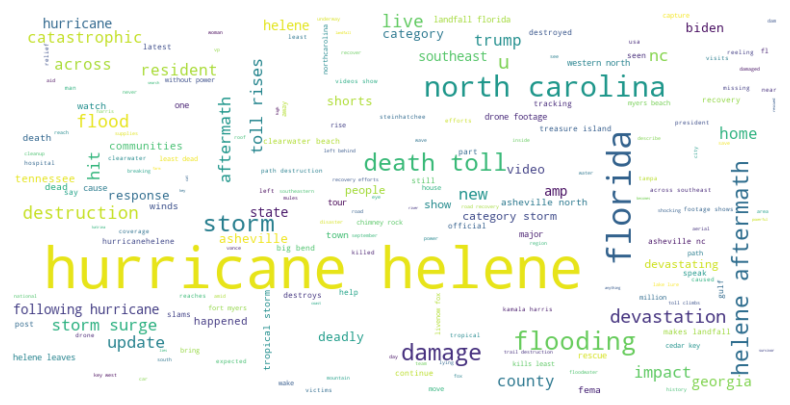

In [25]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["br", "quot"])  # Add "br" and "quot" to stopwords

# Ensure the column is string type
df_drought['title'] = df_drought['title'].astype(str)

# Combine all comments into one text
all_text = ' '.join(df_drought['title'])

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', all_text.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Read the CSV file
df_helene = pd.read_csv("helene.csv")

# Group by state and sum total outages
state_outages = df_helene.groupby("State")["Customers Out"].sum().reset_index()

# Rank states by total outages in descending order
state_outages = state_outages.sort_values(by="Customers Out", ascending=False)

# Display the ranked states
print(state_outages)


FileNotFoundError: [Errno 2] No such file or directory: 'helene.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
df_sentiment = pd.read_csv("hurricane_helene2024-10-06.csv")

# Extract relevant column (assuming last column contains comments)
df_sentiment_cleaned = df_sentiment.iloc[:, -1].dropna().reset_index(drop=True)

# Convert to DataFrame
df_sentiment_cleaned = df_sentiment_cleaned.to_frame(name="Comment")

# Perform sentiment analysis
df_sentiment_cleaned["Polarity"] = df_sentiment_cleaned["Comment"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize sentiment
df_sentiment_cleaned["Sentiment"] = df_sentiment_cleaned["Polarity"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))

# Display results
print(df_sentiment_cleaned.head())


ParserError: Error tokenizing data. C error: Expected 613 fields in line 3, saw 991


In [6]:
pip install TextBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment dataset
df_sentiment = pd.read_csv("hh.csv")

# Select relevant sentiment columns
sentiment_columns = ["comments_love", "comments_anger", "comments_fear", "comments_surprise",
                     "title_sadness", "title_joy", "title_anger", "title_fear", "title_surprise"]

# Ensure time column exists (modify if needed)
df_sentiment["Time"] = pd.to_datetime(df_sentiment["publishTime"], errors="coerce")

# Group sentiment scores by date
df_sentiment_time = df_sentiment.groupby(df_sentiment["Time"].dt.date)[sentiment_columns].mean()

# Display the first few rows
print(df_sentiment_time.head())


ParserError: Error tokenizing data. C error: Expected 613 fields in line 3, saw 991


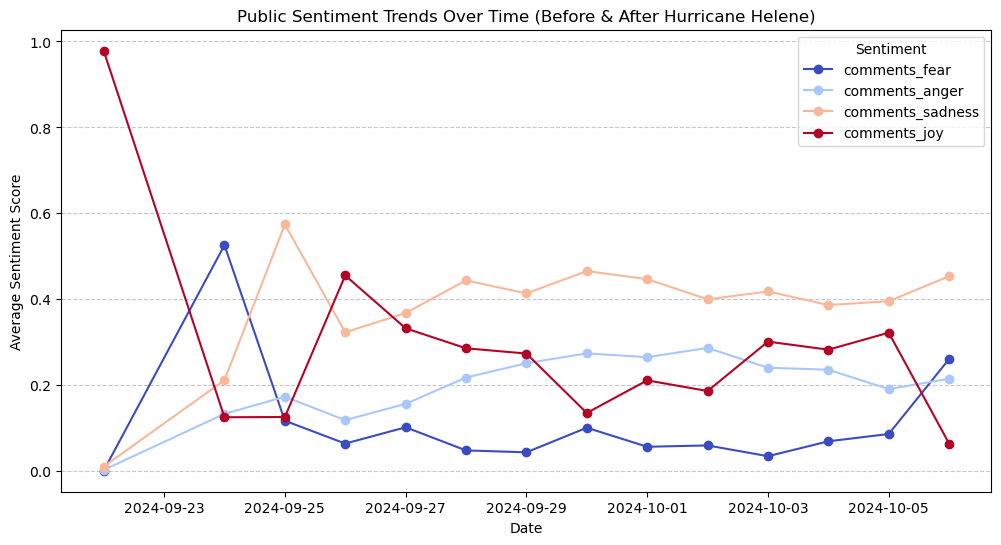

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load processed sentiment dataset
df_sentiment = pd.read_csv("hh.csv", sep="\t")

# Convert timestamp column to datetime
df_sentiment["Time"] = pd.to_datetime(df_sentiment["publishTime"], errors="coerce")

# Group by date and calculate mean sentiment scores
df_sentiment_time = df_sentiment.groupby(df_sentiment["Time"].dt.date)[
    ["comments_fear", "comments_anger", "comments_sadness", "comments_joy"]
].mean()

# Plot sentiment trends
df_sentiment_time.plot(figsize=(12, 6), marker="o", colormap="coolwarm")

plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Public Sentiment Trends Over Time (Before & After Hurricane Helene)")
plt.legend(title="Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


/var/folders/7p/jl_s6y7s7fzcxy7ywg5pypz00000gn/T/ipykernel_37043/1553587735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_title_vs_comment.index, y=df_title_vs_comment.values, palette="coolwarm")


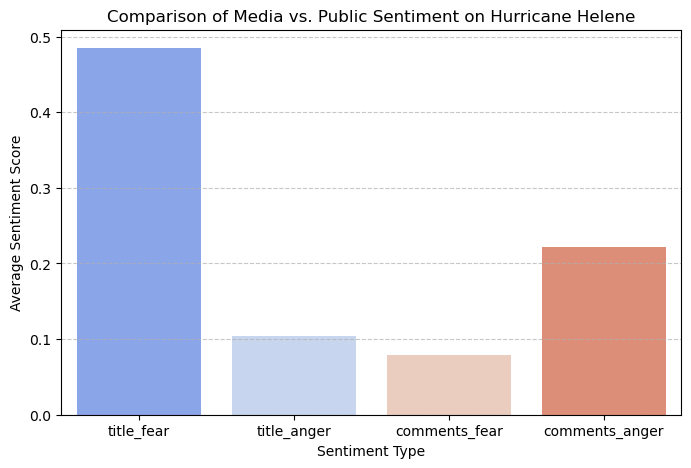

In [14]:
import seaborn as sns

# Compare title sentiment vs. comment sentiment
df_title_vs_comment = df_sentiment[["title_fear", "title_anger", "comments_fear", "comments_anger"]].mean()

# Plot a comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=df_title_vs_comment.index, y=df_title_vs_comment.values, palette="coolwarm")

plt.xlabel("Sentiment Type")
plt.ylabel("Average Sentiment Score")
plt.title("Comparison of Media vs. Public Sentiment on Hurricane Helene")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [4]:
!mkdir helene-outage-analysis
!cd helene-outage-analysis
!mv /Users/adilwaheed/Downloads/helene.ipnyb.  # Move the notebook into the folder


usage: mv [-f | -i | -n] [-hv] source target
       mv [-f | -i | -n] [-v] source ... directory


In [6]:
git init



SyntaxError: invalid syntax (3094403065.py, line 1)

In [8]:
!git init


Initialized empty Git repository in /Users/adilwaheed/emotion/.git/


In [10]:
!https://github.com/adilW-2005/Hurricane-Helene-SentimentAnalysis.git

zsh:1: no such file or directory: https://github.com/adilW-2005/Hurricane-Helene-SentimentAnalysis.git


In [14]:
!git remote add origin !https://github.com/adilW-2005/Hurricane-Helene-SentimentAnalysis.git

In [16]:
!git add helene.ipynb
!git commit -m "Initial commit: Hurricane Helene analysis"


[main (root-commit) 6023def] Initial commit: Hurricane Helene analysis
 Committer: Adil Waheed <adilwaheed@Adils-MacBook-Air.attlocal.net>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1936 insertions(+)
 create mode 100644 helene.ipynb


In [18]:
git branch -M main
git push -u origin main


SyntaxError: invalid syntax (75923871.py, line 1)

In [24]:
!git branch -M main
!git push -u origin main


fatal: protocol '!https' is not supported


In [22]:
!git remote add origin https://github.com/adilW-2005/helene-outage-analysis.git


error: remote origin already exists.


In [26]:
!git add sentiment_analysis.ipynb


fatal: pathspec 'sentiment_analysis.ipynb' did not match any files
